<a href="https://colab.research.google.com/github/alejandraberbesi/Notebooks_ML/blob/main/5_Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El aprendizaje no supervisado es una categoría de algoritmos de machine learning que se utilizan para **encontrar patrones en datos sin etiquetas**. Esto permite descubrir estructuras ocultas y relaciones en los datos.

#PCA (Analisis de componentes principales)

* **¿Qué es el PCA?**
El Análisis de Componentes Principales (PCA) es una técnica que se usa para simplificar datos complejos. Toma datos con muchas variables (características) y los transforma en un conjunto más pequeño de variables, manteniendo la mayor cantidad posible de información original.

* **¿Cómo funciona el PCA?**
  * Normalización: Ajusta los datos para que todas las características tengan la misma escala (media de 0 y una desviación estándar de 1).
  * Matriz de [Covarianza](https://colab.research.google.com/drive/1BF-jJEANnJy9e1Cm14v93YQV_4ZrCYG9#scrollTo=MTTTmwXxlkP_&line=6&uniqifier=1): Calcula cómo varían las características entre sí.
  * Vectores y Valores Propios: Encuentra direcciones principales (componentes) en las que los datos varían más.
  * Reducción de Dimensiones: Selecciona los componentes principales y transforma los datos originales en estas nuevas dimensiones.

* **¿Por qué el PCA es Aprendizaje No Supervisado?**
  * No usa etiquetas: Solo necesita los datos de entrada
  * Descubre patrones
  * Exploración de datos

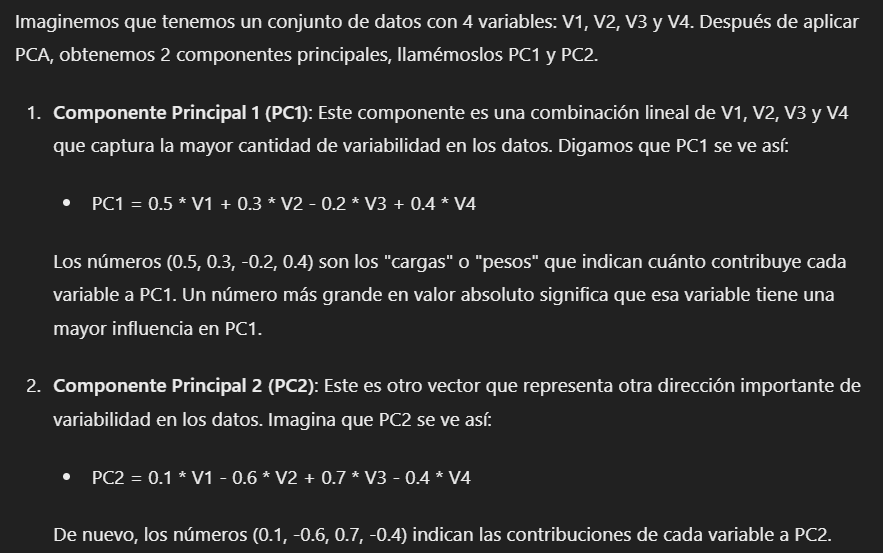

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cargar el dataset de vinos
wine_data = load_wine(as_frame=True)
df = wine_data.data

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

In [ ]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

### ¿PCA cambia los datos originales?

PCA transforma los datos originales en un nuevo conjunto de datos representado por los componentes principales. Los datos transformados son una proyección de los datos originales en un espacio de dimensionalidad reducida definido por los componentes principales. Los datos originales no se modifican, solo se representan de manera diferente.

In [ ]:
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca.head(10)

,Principal Component 1,Principal Component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071
9,2.753628,-0.789438


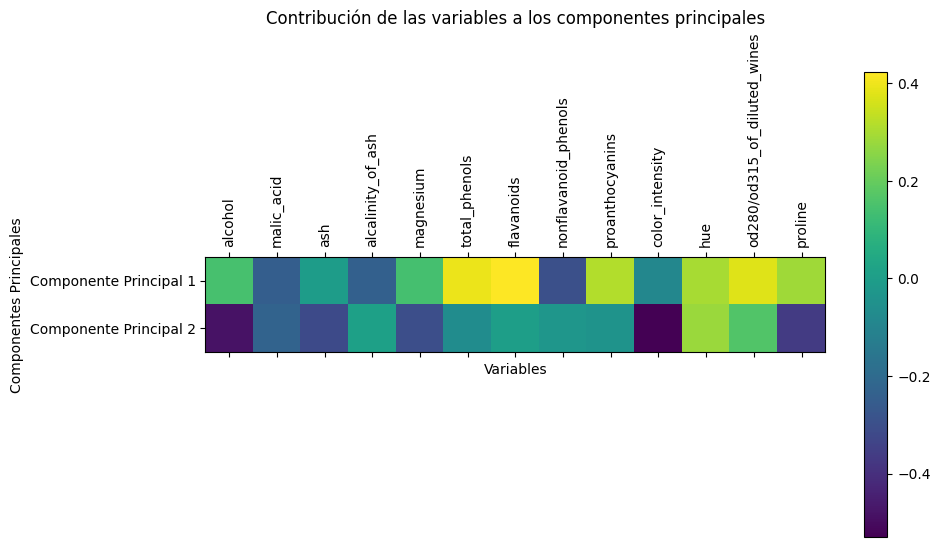

In [ ]:
# Obtener los componentes principales (vectores propios)
components = pca.components_

# Mostrar los componentes principales y sus contribuciones por variable
n_features = df.shape[1]
plt.figure(figsize=(10, 6))
plt.matshow(components, cmap='viridis', fignum=1)
plt.yticks([0, 1], ['Componente Principal 1', 'Componente Principal 2'])
plt.colorbar()
plt.xticks(range(n_features), df.columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Componentes Principales')
plt.title('Contribución de las variables a los componentes principales')
plt.show()

In [ ]:
pca_df= pd.DataFrame(
    data    = components,
    columns = df.columns,
    index   = ['PC1', 'PC2']
)

pca_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


### ¿Cómo se selecciona el número de componentes principales en PCA?

El número de componentes principales se selecciona según la cantidad de varianza que se desea retener en los datos transformados. Generalmente, se observa la varianza explicada acumulativa por cada componente y se selecciona un número que capture un porcentaje alto de la varianza total.

In [ ]:
# Imprimir la varianza explicada por cada componente para el proceso anterior:
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Varianza total explicada: {np.sum(pca.explained_variance_ratio_)}')

Varianza explicada por cada componente: [0.36198848 0.1920749 ]
Varianza total explicada: 0.554063383569353


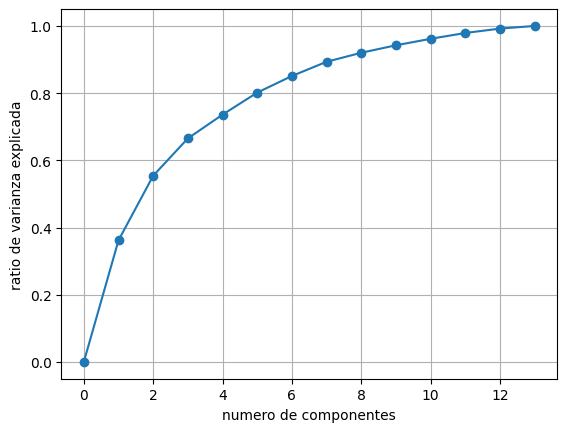

In [ ]:
nums = np.arange(14)

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('numero de componentes')
plt.ylabel('ratio de varianza explicada')
plt.show()

### Otras preguntas

**¿PCA se puede aplicar a datos categóricos?**

No, PCA se aplica típicamente a datos numéricos (continuos) porque se basa en la varianza y covarianza entre variables. Para datos categóricos, se utilizan técnicas específicas como el Análisis de Correspondencias (CA).

**¿PCA es útil para machine learning supervisado?**

PCA en sí mismo no realiza clasificación o predicción. Sin embargo, es útil como una etapa de **preprocesamiento** para mejorar el rendimiento de algoritmos de aprendizaje automático. Reducir la dimensionalidad con PCA puede mejorar la eficiencia computacional y reducir el riesgo de sobreajuste al eliminar ruido o redundancia en los datos.

**¿Cuándo no debería usar PCA?**

No deberías usar PCA si la interpretación de las variables originales es crucial y no puedes comprometerte con la pérdida de interpretabilidad que conlleva la transformación de los datos. Además, si la dimensionalidad de los datos es baja o si las variables son altamente descriptivas por sí mismas, PCA puede no ser necesario o incluso perjudicial.

# K-means

**¿Qué es K-means?**

K-means es un algoritmo que agrupa datos en un número predefinido de grupos (clusters). Cada grupo contiene datos que son similares entre sí, y diferentes de los datos en otros grupos. La "K" en K-means representa el número de clusters que deseas encontrar.

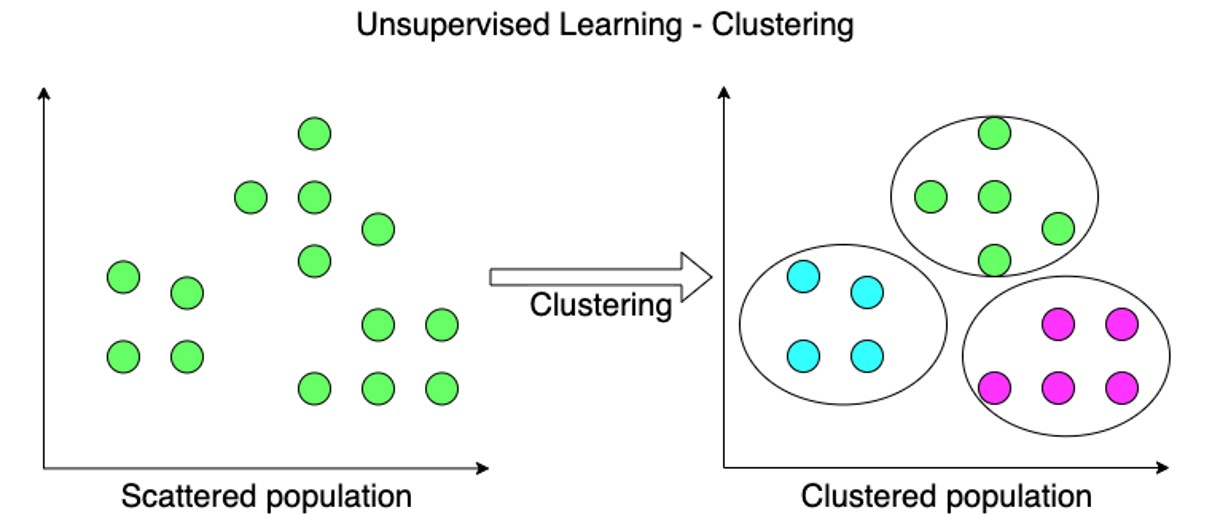

**¿Cómo funciona K-means?**

El algoritmo K-means sigue estos pasos básicos:
* Inicialización: Seleccionar aleatoriamente K puntos como los centros iniciales de los clusters (llamados centroides).
* Asignación de clusters:
  * Para cada punto en el conjunto de datos, calcular la distancia a cada uno de los K centroides.
  * Asignar cada punto al cluster cuyo centroide esté más cercano.
* Recalcular centroides:
  Después de que todos los puntos hayan sido asignados a un cluster, recalcular la posición del centroide de cada cluster como el promedio de todos los puntos en ese cluster.
* Repetir: Repetir los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance un número máximo de iteraciones.

In [ ]:
from IPython.display import Image
Image(url='https://media.licdn.com/dms/image/C4D12AQE5wSXLV95kZQ/article-cover_image-shrink_720_1280/0/1626712648675?e=1724284800&v=beta&t=eyCGVoSCz3eqOYZZ4oKo5VyUuF68RP0doi-1Z_eKVG4')

In [ ]:
mc_df=pd.read_csv('https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv')
mc_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
sc_mcdf= mc_df.drop(columns='Gender',axis=1)
sc_mcdf.set_index('CustomerID',inplace=True)
sc_mcdf.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [ ]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(sc_mcdf)
df_scaled=pd.DataFrame(X_scaled,columns=sc_mcdf.columns,index=sc_mcdf.index)
df_scaled.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


**Metodo del codo**

1. Se crean varios algoritmos con diferentes k (cantidad de clusters).
2. Se calculan las distancias de cada uno de los elementos de un cluster a cada centroide, se eleva al cuadrado y se halla el total (inercia).
3. La idea es que entre menor sea esta suma total sera mejor porque indicara que los clusters encontrados son bastante homogeneos (son muy similares los puntos de cada cluster entre si).


In [ ]:
from sklearn.cluster import KMeans

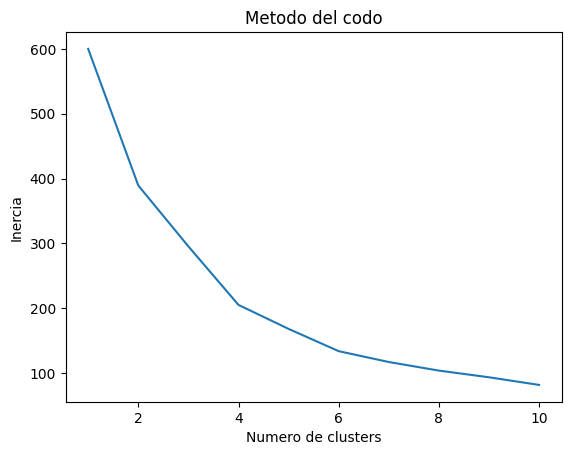

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0,n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

In [ ]:
algorithm = KMeans(n_clusters=6, random_state=0,
                   n_init=10 #cuántas veces se ejecutará el algoritmo K-means
                   )

In [ ]:
#hago mis asignaciones de categorias o grupos, al final tengo un dataframe donde cada fila pertenece a un cluster

y_kmeans = algorithm.fit_predict(df_scaled)

resultados_finales=df_scaled
resultados_finales['cluster'] = pd.DataFrame(y_kmeans)
resultados_finales.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,5.0
2,-1.281035,-1.738999,1.195704,4.0
3,-1.352802,-1.700830,-1.715913,5.0
4,-1.137502,-1.700830,1.040418,4.0
5,-0.563369,-1.662660,-0.395980,5.0


In [ ]:
algorithm.cluster_centers_  #centros de los clusters, estan escalados

array([[-0.85043527, -0.14894113, -0.04147777],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [ 0.47895722, -1.30822992, -1.19644353],
       [-0.99396865, -1.34734766,  1.06404834]])

In [ ]:
#creando dataframe con rangos de columnas originales
df_merged = sc_mcdf.merge(resultados_finales[['cluster']], left_index=True, right_index=True)
df_merged.head(5)

,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,
1,19,15,39,5.0
2,21,15,81,4.0
3,20,16,6,5.0
4,23,16,77,4.0
5,31,17,40,5.0


In [ ]:
# Calcular el promedio de las columnas originales por cluster
df_merged.groupby('cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0.0,43.473684,56.342105,52.657895
1.0,41.622222,53.755556,50.888889
2.0,40.384615,86.538462,19.641026
3.0,32.500000,86.617647,82.000000
4.0,25.857143,25.190476,79.380952
5.0,45.090909,25.727273,20.227273


In [ ]:
#Grafico en varias dimensiones de los clusters resultado

import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo

traces = []
unique_clusters = df_merged['cluster'].unique()
for cluster in unique_clusters:
    cluster_data = df_merged[df_merged['cluster'] == cluster]
    trace = go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Annual Income (k$)'],
        z=cluster_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.8
        ),
        name=f'Cluster {cluster}'
    )
    traces.append(trace)

# Configurar el layout del gráfico
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # Márgenes del gráfico
    showlegend=True  # Mostrar la leyenda
)

# Crear la figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico en el notebook
pyo.iplot(fig)

### ¿Cuáles son las limitaciones de K-means?

Las principales limitaciones de K-means son:

* Necesita predefinir el número de clusters
𝐾
* Sensible a la inicialización de los centroides.
* No maneja bien clusters de formas no esféricas o de tamaños muy diferentes.
* Puede verse afectado por outliers (puntos de datos atípicos).

# Clustering Jerarquico Aglomerativo

**Proceso General del Clustering Jerárquico**

* Inicialización: Comienza con cada punto de datos como su propio clúster.
* Cálculo de Distancias: Calcula las distancias entre todos los pares de clústeres utilizando la métrica de distancia especificada (en este caso, la distancia euclidiana).
* Fusión de Clústeres: En cada paso, fusiona los dos clústeres que están más cerca el uno del otro según la métrica de distancia.
* Repetición: Repite el proceso de fusión hasta que todos los puntos de datos se hayan fusionado en un único clúster.
* Construcción de la Jerarquía: El resultado es una jerarquía de clústeres que puede ser representada visualmente con un dendrograma.

In [ ]:
df_scaled2=pd.DataFrame(X_scaled,columns=sc_mcdf.columns,index=sc_mcdf.index)
df_scaled2.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df_scaled2,
                       method='ward', #metodo de vinculacion para fusionar clusteres:
                                      #Funciona minimizando la suma de cuadrados dentro de los clústeres
                                      #(es decir, busca agrupar los datos de manera que la variabilidad dentro de cada clúster sea lo más pequeña posible).
                       metric='euclidean') #calcular las distancias entre los puntos de datos

**Dendrogramas** son representaciones visuales de los resultados del clustering jerárquico, donde cada unión de clústeres se muestra como una línea horizontal. La altura en el eje vertical indica la distancia euclidiana o alguna otra métrica de distancia entre los clústeres combinados.

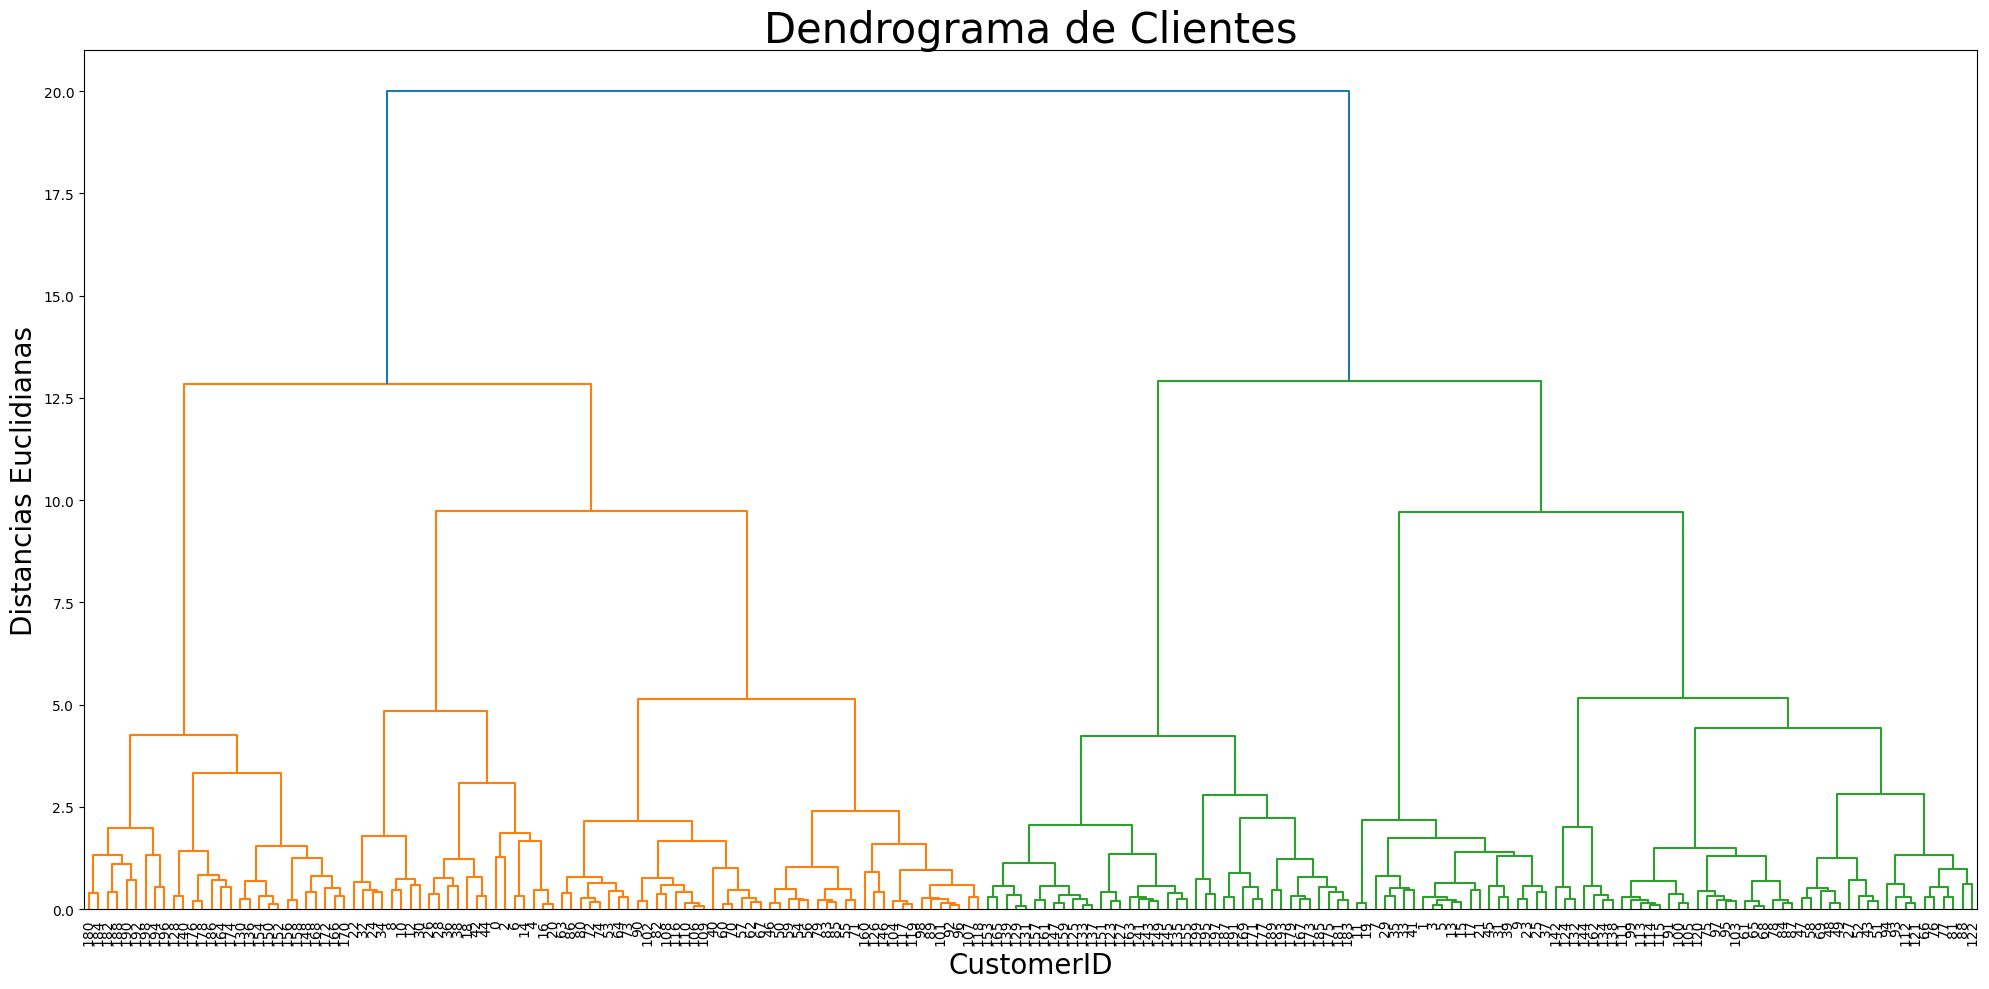

In [ ]:
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura
plt.title("Dendrograma de Clientes", fontsize=30)  # Ajusta el tamaño del título
dendrogram(linkage_data, leaf_rotation=90, leaf_font_size=10)  # Rotar las etiquetas y ajustar el tamaño de fuente
plt.xlabel("CustomerID", fontsize=20)  # Ajusta el tamaño de la fuente del eje x
plt.ylabel("Distancias Euclidianas", fontsize=20)  # Ajusta el tamaño de la fuente del eje y
plt.tight_layout()  # Ajustar el diseño para que no haya superposición
plt.show()

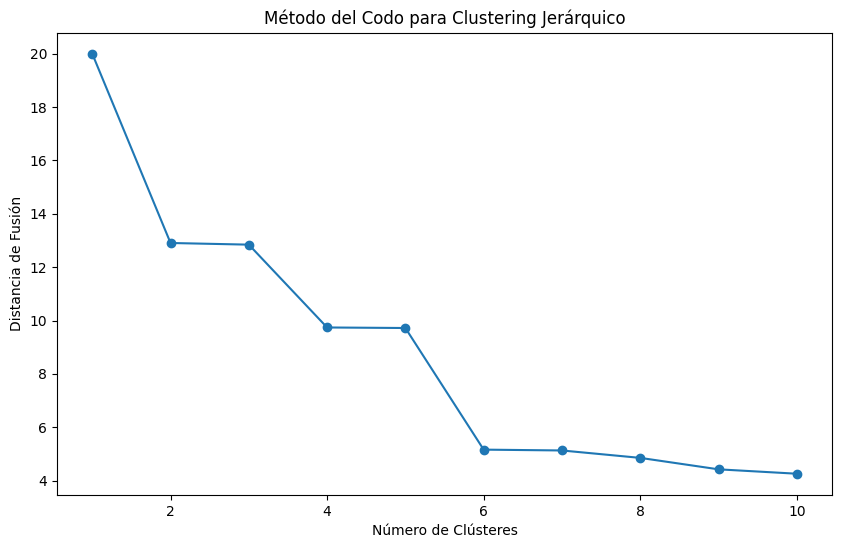

In [ ]:
# Calcular el Método del Codo
last = linkage_data[-10:, 2]  # extrae las últimas 10 distancias de fusión del dendrograma de clustering jerárquico.
last_rev = last[::-1]  # Revertir el orden
indexes = np.arange(1, len(last) + 1)

plt.figure(figsize=(10, 6))
plt.plot(indexes, last_rev, marker='o')
plt.title("Método del Codo para Clustering Jerárquico")
plt.xlabel("Número de Clústeres")
plt.ylabel("Distancia de Fusión")
plt.show()

**Cuanto menor sea la distancia de fusión en un nivel particular del dendrograma, más similares son los clusters que se están fusionando en ese paso.**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled2)

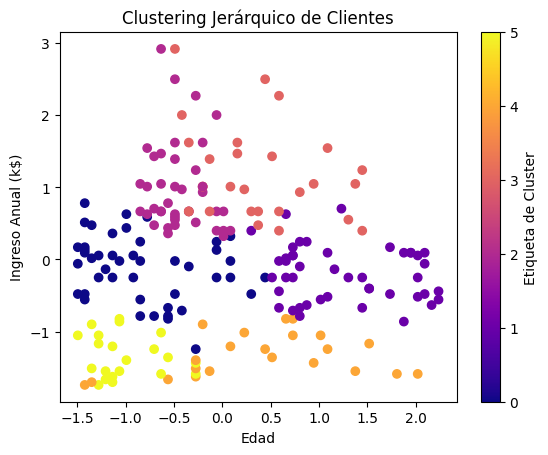

In [ ]:
scatter=plt.scatter(df_scaled2.iloc[:, 0], df_scaled2.iloc[:, 1], c=y_hc, cmap='plasma')
# Obtener colores únicos según las etiquetas de clúster
unique_labels = np.unique(y_hc)
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_labels)))
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Clustering Jerárquico de Clientes')
plt.colorbar(scatter, label='Etiqueta de Cluster')
plt.show()

#Clustering Basado en Densidad (DBSCAN)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en densidad que es útil para identificar clústeres de formas arbitrarias en un conjunto de datos con ruido. A diferencia de otros métodos de clustering como K-means, DBSCAN no requiere especificar el número de clústeres de antemano y es capaz de manejar ruido y outliers de manera efectiva.

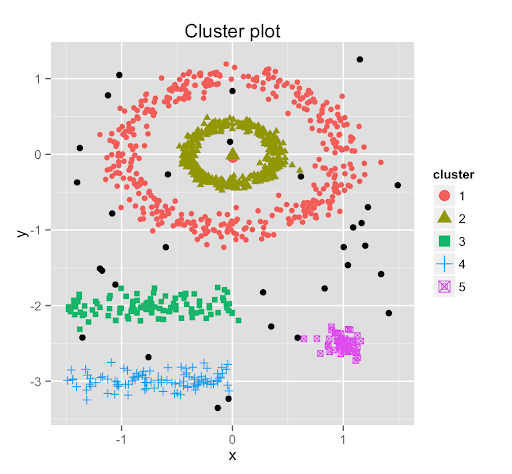

* **eps (epsilon):** Este parámetro define la distancia máxima entre dos puntos para que uno sea considerado como vecino del otro. En otras palabras, es la distancia máxima que el algoritmo considerará para agrupar puntos en un mismo cluster.
* **min_samples:** El número mínimo de puntos necesarios para formar un grupo.

**Funcionamiento:** Para cada punto en el conjunto de datos, DBSCAN examina todos los puntos que están dentro de una distancia *eps* de ese punto. Si hay suficientes puntos dentro de esta distancia (*min_samples*), entonces el punto se considera parte de un cluster.  Los puntos que no cumplen con este criterio y no están dentro de ningún cluster se clasifican como **outliers**.

**Ejemplo práctico:**

Imaginemos que estás utilizando DBSCAN con eps=0.5 y min_samples=5 para agrupar personas según su ubicación en un parque:

  * **eps=0.5**: Significa que DBSCAN agrupará personas que están a menos de 0.5 metros unas de otras.

  * **min_samples=5**: Para que DBSCAN forme un grupo o cluster de personas, debe encontrar al menos un grupo de 5 personas que estén todas dentro de 0.5 metros entre sí. Esto asegura que los grupos formados sean densos y significativos.
  * Los puntos individuales que no cumplen con estos requisitos se considerarán **outliers**, indicando posiblemente ubicaciones aisladas o grupos pequeños que no cumplen con la densidad requerida para formar un cluster.

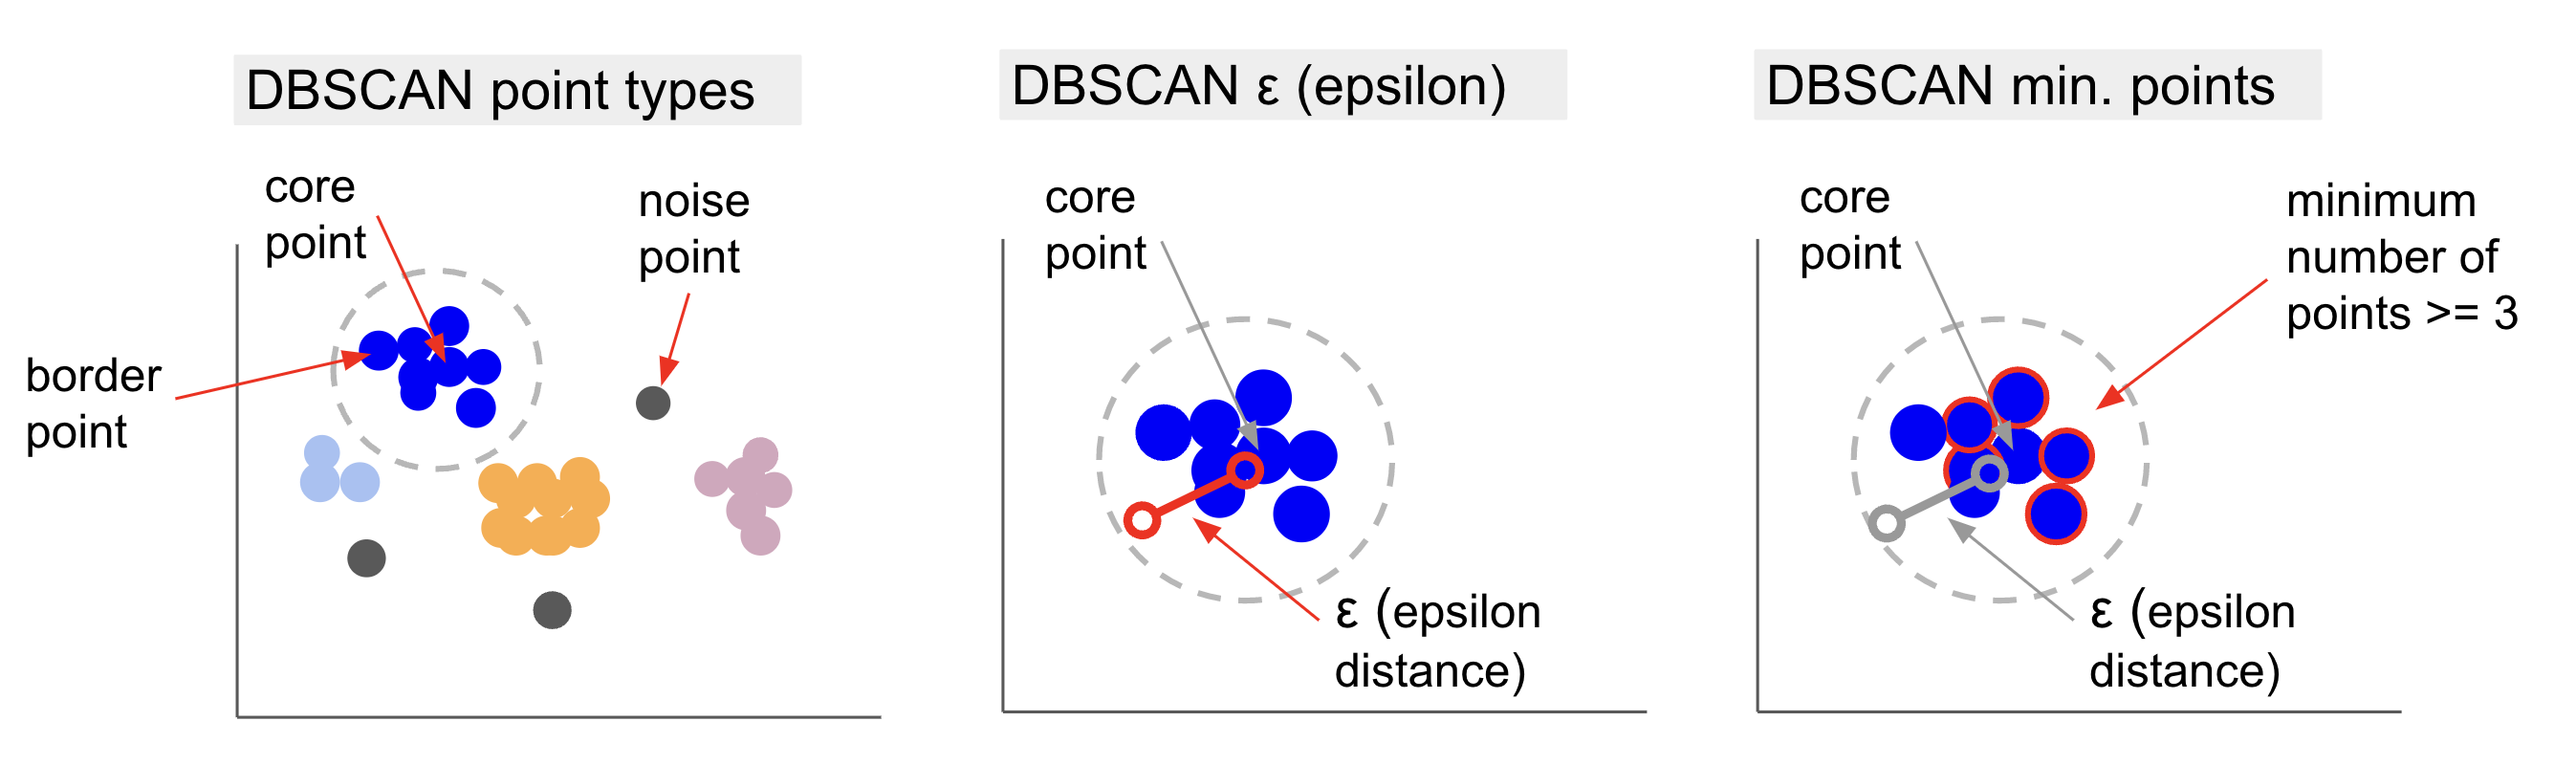

In [ ]:
from IPython.display import Image
Image(url='https://media.licdn.com/dms/image/C5612AQHYc7HfU1jD3g/article-cover_image-shrink_720_1280/0/1611735338466?e=1724889600&v=beta&t=FdV2ehTE4QjNDDgYAS37m9kCNZzP3LcQ3tK1NX6rKEw')

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(df_scaled2)

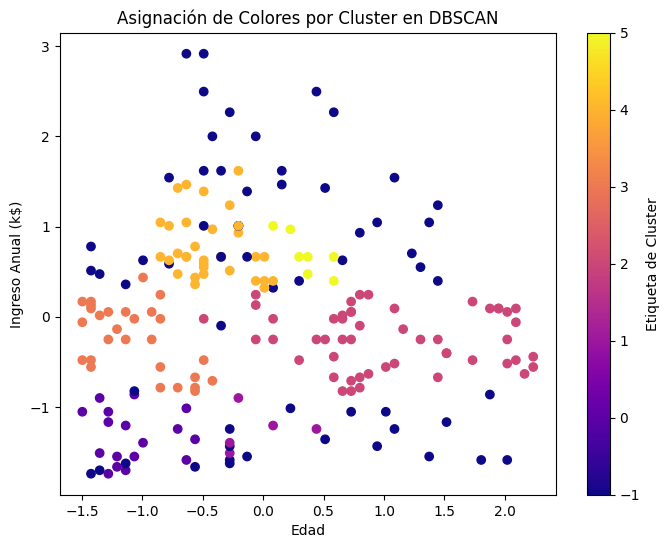

In [ ]:
plt.figure(figsize=(8, 6))

# Obtener colores únicos según las etiquetas de clúster
unique_labels = np.unique(y_dbscan)
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_labels)))

# Mostrar el gráfico de dispersión solo con los colores y etiquetas
scatter = plt.scatter(df_scaled2.iloc[:, 0], df_scaled2.iloc[:, 1], c=y_dbscan, cmap='plasma')

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Asignación de Colores por Cluster en DBSCAN')

# Mostrar el gráfico
plt.colorbar(scatter, label='Etiqueta de Cluster')
plt.show()

### ¿Qué es el Silhouette Score?

Para cada punto de datos: Primero, se calcula el Silhouette Score para un punto específico. Esto implica medir la cohesión dentro del cluster al que pertenece ese punto y la separación respecto a los clusters más cercanos.

**Cómo se calcula:**
* Se mide la distancia promedio de ese punto a todos los demás puntos en su mismo cluster. Esta es la medida de cohesión.
* Se calcula la distancia promedio de ese punto a todos los puntos en el cluster más cercano que no es el suyo. Esta es la medida de separación.
* Utiliza la fórmula del Silhouette Score para obtener el valor correspondiente para cada punto.
* Finalmente, calcula el promedio de todos los Silhouette Scores individuales para obtener el valor promedio del Silhouette Score para todo el conjunto de datos.

**Resultado:**
El valor devuelto por silhouette_score es un número entre -1 y 1.
* **Cuanto más cercano a +1**, mejor es la calidad del clustering, indicando que los puntos están bien agrupados dentro de sus clusters y separados de otros clusters. *Se busca este resultado.*
* **Un valor cercano a 0** sugiere que los puntos están en el límite entre dos clusters.
* **Cerca de -1** indica que los puntos podrían estar mejor asignados a otros clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(df_scaled2, y_dbscan)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.18451372756506046


**Iterando varias combinaciones posibles para encontrar el mejor silhouette score**

El siguiente código realiza un grid search exhaustivo sobre los valores especificados para eps y min_samples, ajusta un modelo DBSCAN para cada combinación y calcula el silhouette score para evaluar la calidad de los clusters formados.

La combinación de parámetros que resulte en el silhouette score más cercano a 1 será la seleccionada como la mejor  y luego se entrenara el DBSCAN con esto para ver los resultados.

In [ ]:
#Define los rangos de valores para eps y min_samples que deseas explorar:
eps_values = [0.1, 0.5,1]
min_samples_values = [2, 5, 10, 15, 20]

#Inicializa variables para almacenar los mejores resultados:
best_eps = None
best_min_samples = None
best_silhouette_score = -1 #un valor muy negativo para comparar y almacenar el resultado en los modelos

In [ ]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(df_scaled2)

        # Calcular el silhouette score solo si hay más de un cluster
        if len(np.unique(y_dbscan)) > 1:
            silhouette = silhouette_score(df_scaled2, y_dbscan)

            # Actualizar el mejor resultado si encontramos uno mejor
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

print(f"Mejor combinación de parámetros: eps={best_eps}, min_samples={best_min_samples}")
print(f"Silhouette Score: {best_silhouette_score}")

Mejor combinación de parámetros: eps=1, min_samples=5
Silhouette Score: 0.31312515071066704


In [ ]:
dbscan2 = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_dbscan2 = dbscan.fit_predict(df_scaled2)

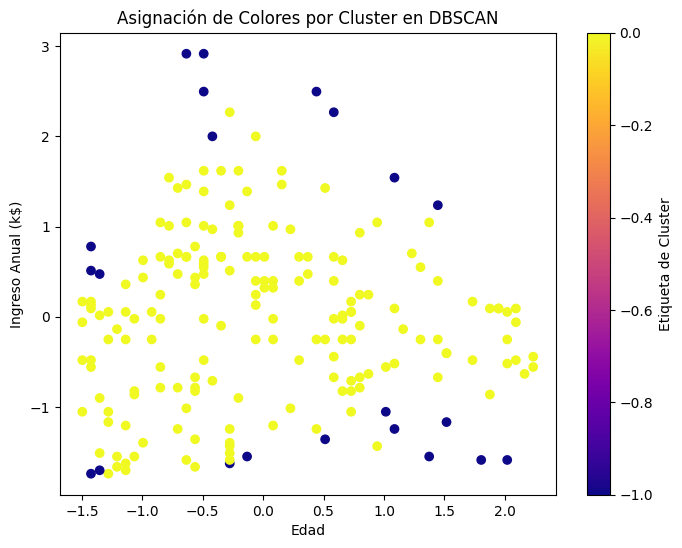

In [ ]:
plt.figure(figsize=(8, 6))

# Obtener colores únicos según las etiquetas de clúster
unique_labels = np.unique(y_dbscan2)
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_labels)))

# Mostrar el gráfico de dispersión solo con los colores y etiquetas
scatter = plt.scatter(df_scaled2.iloc[:, 0], df_scaled2.iloc[:, 1], c=y_dbscan2, cmap='plasma')

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Asignación de Colores por Cluster en DBSCAN')

# Mostrar el gráfico
plt.colorbar(scatter, label='Etiqueta de Cluster')
plt.show()